# Quantum cryptography course analysis

In [7]:
# imports
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import psycopg2 as pg
import pandas.io.sql as psql
import matplotlib
matplotlib.style.use('ggplot')

# graphics setup
%matplotlib inline
sns.set(color_codes=True)

# set up connection to the database
connection = pg.connect(database="askalot_anonymized", user="postgres", port=5432, 
                        host="localhost", password="")

In [8]:
# read questions and filter columns
questions = psql.read_sql("SELECT * FROM questions", connection)
questions = questions[['id', 'author_id', 'category_id', 'title', 'text', 
                   'created_at', 'votes_difference', 'anonymous', 'answers_count',
                   'comments_count', 'favorites_count']]
questions['ans_plus_comments'] = questions['answers_count'] + questions['comments_count']
questions.head()

,id,author_id,category_id,title,text,created_at,votes_difference,anonymous,answers_count,comments_count,favorites_count,ans_plus_comments
0,232,3115,2,"Hello From Guadalajara, Mexico",Hi All my name is Luis Iam a Data Scientist fr...,2016-10-13 07:37:37.829332,0,False,1,0,0,1
1,144,1635,2,hi there,live long and prosper,2016-09-19 19:18:47.399977,0,False,0,0,0,0
2,8,93,2,Hello from Frankfurt :-),"Hi everyone,\r\nI hold a Master degree in Tele...",2016-09-08 18:46:51.079234,0,False,2,0,0,2
3,32,263,2,Mark Weitzman,My interests are in theoretical physics (I am ...,2016-09-09 00:35:57.294668,2,False,2,3,0,5
4,10,102,5,Start Date,Has the course officially started or is Week 0...,2016-09-08 18:54:04.910026,0,False,0,0,0,0


In [9]:
questions['answers_count'].describe()

count    473.000000
mean       0.849894
std        0.742680
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: answers_count, dtype: float64

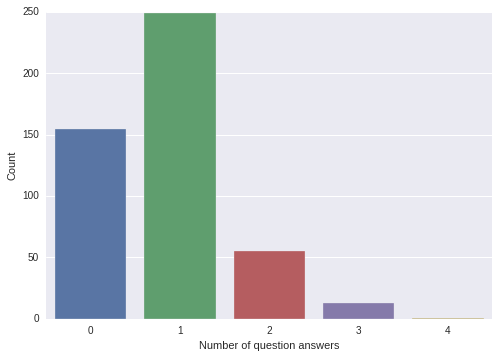

In [10]:
ax = sns.countplot(x="answers_count", data=questions)
ax.set(xlabel='Number of question answers', ylabel='Count')

In [11]:
# read answers and filter columns
answers = psql.read_sql("SELECT * FROM answers", connection)
answers = answers[['id', 'author_id', 'question_id', 'text', 'votes_difference', 'comments_count',
                   'votes_count']]
answers.head()

,id,author_id,question_id,text,votes_difference,comments_count,votes_count
0,68,1382,112,Hi all of you this is Emmanuel from Ghana. I ...,0,0,0
1,183,4,226,Welcome Chemist - I'm sure you'll find your sk...,0,0,0
2,2,214,13,"Hi, myself Shaswat Deep. I am Software Enginee...",0,0,0
3,121,7,175,Hi Hussain! Your background in (classical) sec...,0,0,0
4,4,6,5,Welcome Shiladittya!\r\n\r\nStephanie,0,0,0


In [12]:
answers['votes_difference'].describe()

count    426.000000
mean       0.410798
std        1.046125
min       -1.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       14.000000
Name: votes_difference, dtype: float64

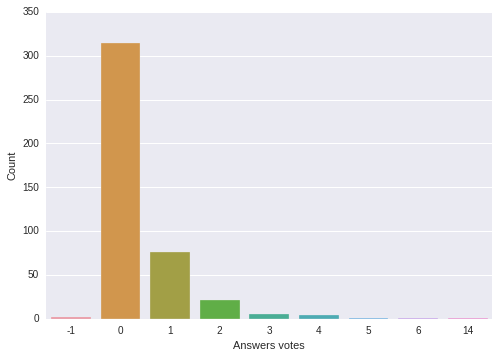

In [13]:
ax = sns.countplot(x="votes_difference", data=answers)
ax.set(xlabel='Answers votes', ylabel='Count')

In [14]:
# read users and filter columns
users = psql.read_sql("SELECT * FROM users", connection)
users = users[['id', 'login', 'email', 'answers_count', 'comments_count', 'favorites_count',
               'questions_count', 'views_count', 'votes_count']]
users['ans_plus_comments'] = users['answers_count'] + users['comments_count']
users.head()

,id,login,email,answers_count,comments_count,favorites_count,questions_count,views_count,votes_count,ans_plus_comments
0,463,fpdWYZ,username+2151@gmail.com,0,0,0,0,0,0,0
1,464,Fa4en2cr,username+2152@gmail.com,0,0,0,0,0,0,0
2,465,XJrQdh,username+2153@gmail.com,0,0,0,0,0,0,0
3,469,rUPCU,username+2154@gmail.com,0,0,0,0,0,0,0
4,2903,n41dFfvX,username+1@gmail.com,0,0,0,0,0,0,0


In [15]:
print(users['answers_count'].describe())
print('Median: \t'+str(users['answers_count'].median()))
print('')
print(users['questions_count'].describe())
print('Median: \t'+str(users['questions_count'].median()))
print('')
print(users['comments_count'].describe())
print('Median: \t'+str(users['comments_count'].median()))

count    4211.000000
mean        0.095464
std         1.672583
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        81.000000
Name: answers_count, dtype: float64
Median: 	0.0

count    4211.000000
mean        0.102826
std         0.678911
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        21.000000
Name: questions_count, dtype: float64
Median: 	0.0

count    4211.000000
mean        0.115887
std         1.403715
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        43.000000
Name: comments_count, dtype: float64
Median: 	0.0


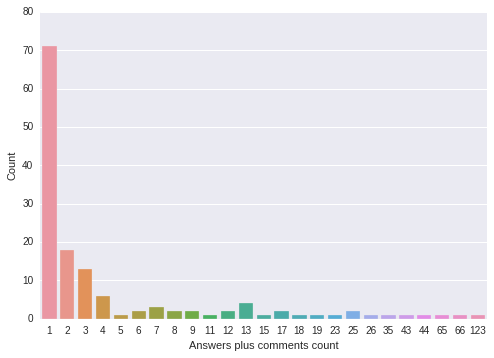

In [16]:
ax = sns.countplot(x="ans_plus_comments", data=users.loc[users["ans_plus_comments"] > 0])
ax.set(xlabel='Answers plus comments count', ylabel='Count')

In [17]:
groups = psql.read_sql("SELECT ab.ab_group_id, u.id, u.answers_count, u.questions_count, u.comments_count "+
                           "FROM ab_groupings ab JOIN users u ON u.id = ab.user_id", connection)
groups["ab_group_id"] = groups["ab_group_id"].astype('category')
groups.columns = ['ab_group_id', 'user_id', 'Answers count', 'Questions count', 'Comments count']
groups.describe()
#groups.dtypes

,user_id,Answers count,Questions count,Comments count
count,3918.000000,3918.000000,3918.000000,3918.000000
mean,1960.644717,0.101582,0.109495,0.124298
std,1132.015328,1.732682,0.702675,1.454832
min,1.000000,0.000000,0.000000,0.000000
25%,980.250000,0.000000,0.000000,0.000000
50%,1961.500000,0.000000,0.000000,0.000000
75%,2940.750000,0.000000,0.000000,0.000000
max,3920.000000,81.000000,21.000000,43.000000


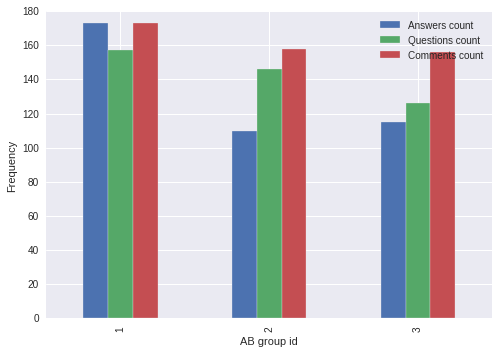

In [18]:
# Distribution of ab groups
#sns.factorplot(x="ab_group_id", y="questions_count", data=groups, size=6, kind="bar", palette="muted")
ax = groups.groupby('ab_group_id')["Answers count", "Questions count", "Comments count"].sum().plot(kind="bar")
ax.set(xlabel='AB group id', ylabel='Frequency')

In [19]:
# read categories and filter columns
categories = psql.read_sql("SELECT * FROM categories", connection)
categories = categories[['id','name', 'parent_id', 'questions_count', ]]

categories.head()

,id,name,parent_id,questions_count
0,3,Getting started,1.0,0
1,10,Lecture 1,11.0,3
2,117,3.5 Extended UR principles: tripartite version,108.0,0
3,42,1. Quantum tools and a first protocol,1.0,0
4,93,2.4 Sharing a classical secret using quantum s...,75.0,0
